---
layout: post
title:  "User Posting Trend and Seasonality"
date:   2021-05-16
category: data_analysis
tags: Python Seaborn statsmodels
---

In this section, we analyze the trend and seasonality of users' posting habits. 

The number of works posted to the Archive is time-series data, which means a set of obervations obtained in different time periods. We are not going into details of time-series models in this section. Instead, we'll briefly showcase two basic time-series analysis: autocorrelation in the time series data and decomposing trend and seasonality from the data set.

* Table of Contents
{:toc}

# Loading File

In [2]:
# Load Python library
import pandas as pd

# Load file
path="/home/pi/Downloads/works-20210226.csv"
chunker = pd.read_csv(path, chunksize=10000)
works = pd.concat(chunker, ignore_index=True)

# Data Cleaning

Since majority of the works posted to AO3 are in English, we choose English works in the data set for analysis. The data set contains the creation date of each work, and we're going to sum up the number of works posted per month. All of the Python functions used here are discussed in previous blog posts.

In [15]:
# Select two columns that we're interested in
# Select English works for analysis
eng = works[['creation date','language']][works['language'] == 'en']

# Drop NA values
eng = eng.dropna()

# Preview of the DataFrame
eng

,creation date,language
0,2021-02-26,en
1,2021-02-26,en
2,2021-02-26,en
3,2021-02-26,en
4,2021-02-26,en
...,...,...
7269688,2008-09-13,en
7269689,2008-09-13,en
7269690,2008-09-13,en
7269691,2008-09-13,en


In [17]:
# Make sure date column is in datetime format
eng['creation date'] = pd.to_datetime(eng['creation date'])

# Group by monthly posting 
# Use pd.Grouper because it aggregates throughout the years
eng = eng.groupby([pd.Grouper(key='creation date',freq='1M')]).count()

# Preview of the DataFrame
eng

,language
creation date,
2008-09-30,928
2008-10-31,480
2008-11-30,337
2008-12-31,239
2009-01-31,499
...,...
2020-10-31,141120
2020-11-30,122796
2020-12-31,154417


# Simple Visualization

In [19]:
# Import libraries
# Top line is Jupyter Notebook specific

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='creation date'>

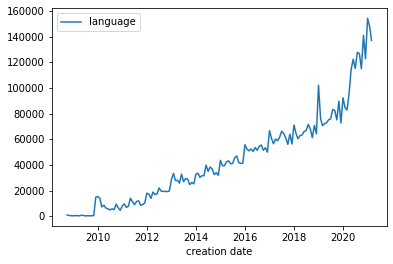

In [21]:
# Line plot using seaborn library
# Orignal data
sns.lineplot(data=eng)

# Decomposing A Time Series Data

In [27]:
# Import Statsmodels library
from statsmodels.tsa.seasonal import seasonal_decompose

# Adjust figure size
plt.rcParams['figure.figsize'] = [7, 5]

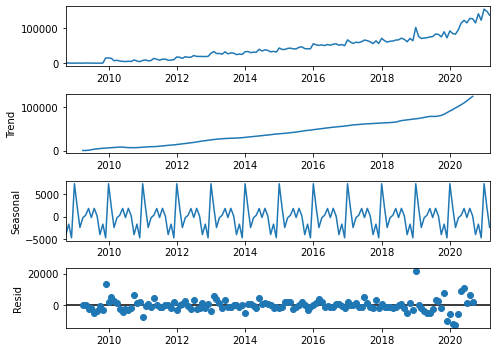

In [28]:
# Additive Decomposition
result_add = seasonal_decompose(eng, model='additive')
ax=result_add.plot()

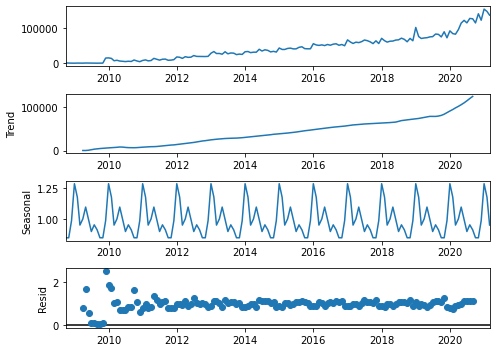

In [29]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(eng, model='multiplicative')
ax = result_mul.plot()